In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.ensemble import RandomForestClassifier

In [2]:
df = pd.read_csv('Company_Data.csv')
df.head()

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,9.50,138,73,11,276,120,Bad,42,17,Yes,Yes
1,11.22,111,48,16,260,83,Good,65,10,Yes,Yes
2,10.06,113,35,10,269,80,Medium,59,12,Yes,Yes
3,7.40,117,100,4,466,97,Medium,55,14,Yes,Yes
4,4.15,141,64,3,340,128,Bad,38,13,Yes,No


In [3]:
df.describe()

,Sales,CompPrice,Income,Advertising,Population,Price,Age,Education
count,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000
mean,7.496325,124.975000,68.657500,6.635000,264.840000,115.795000,53.322500,13.900000
std,2.824115,15.334512,27.986037,6.650364,147.376436,23.676664,16.200297,2.620528
min,0.000000,77.000000,21.000000,0.000000,10.000000,24.000000,25.000000,10.000000
25%,5.390000,115.000000,42.750000,0.000000,139.000000,100.000000,39.750000,12.000000
50%,7.490000,125.000000,69.000000,5.000000,272.000000,117.000000,54.500000,14.000000
75%,9.320000,135.000000,91.000000,12.000000,398.500000,131.000000,66.000000,16.000000
max,16.270000,175.000000,120.000000,29.000000,509.000000,191.000000,80.000000,18.000000


In [4]:
df.isnull().sum()

Sales          0
CompPrice      0
Income         0
Advertising    0
Population     0
Price          0
ShelveLoc      0
Age            0
Education      0
Urban          0
US             0
dtype: int64

In [5]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [6]:
cols = ['ShelveLoc','Urban','US']
df[cols] = df[cols].apply(le.fit_transform)
df.head()

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,9.50,138,73,11,276,120,0,42,17,1,1
1,11.22,111,48,16,260,83,1,65,10,1,1
2,10.06,113,35,10,269,80,2,59,12,1,1
3,7.40,117,100,4,466,97,2,55,14,1,1
4,4.15,141,64,3,340,128,0,38,13,1,0


<AxesSubplot:>

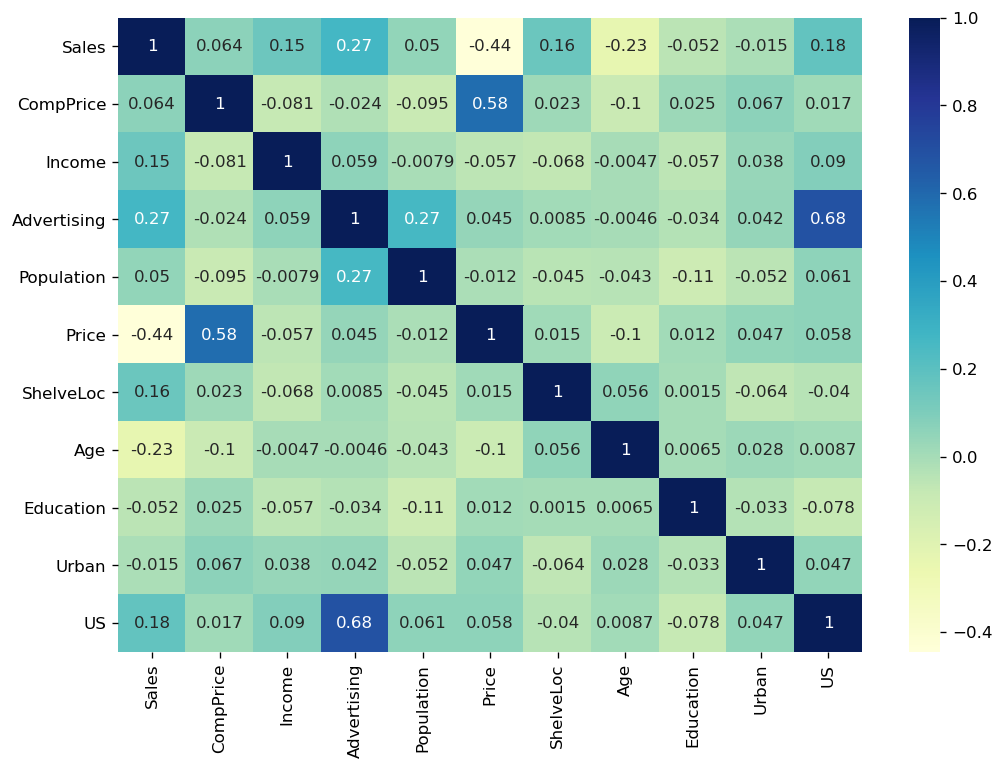

In [7]:
plt.rcParams['figure.figsize'] = (10,7)
plt.rcParams["figure.dpi"] = 120
corr = df.corr()
sns.heatmap(corr, annot=True,cmap="YlGnBu")

C:\Users\Lenovo\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Sales', ylabel='Density'>

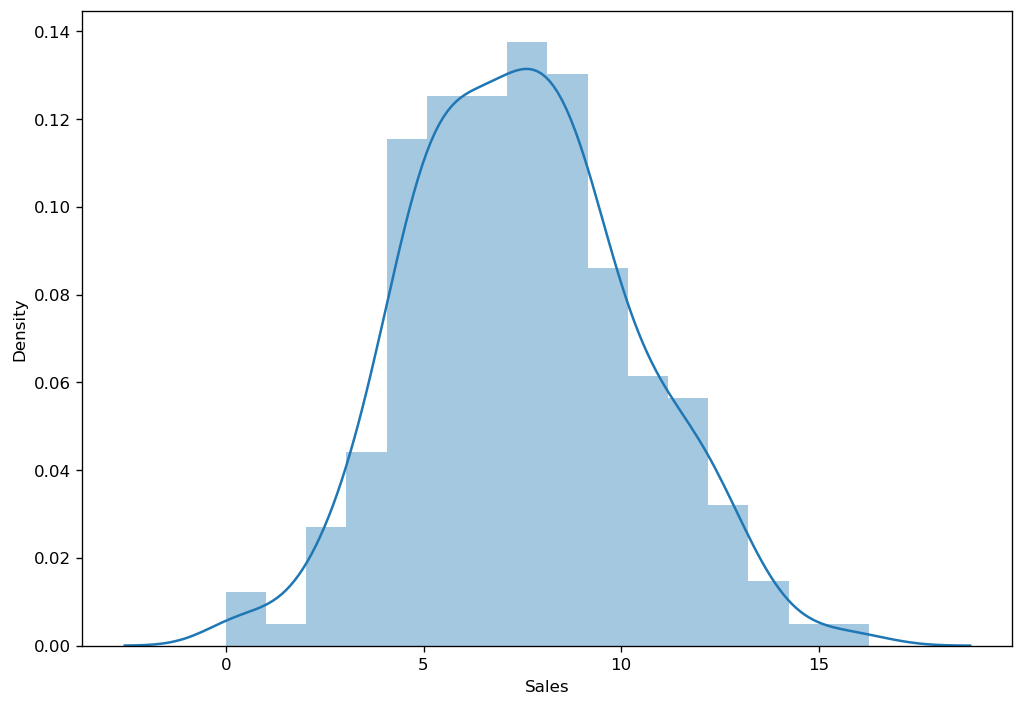

In [8]:
sns.distplot(df['Sales'])

In [9]:
def num_to_cat(i):
    if i < 5:
        return 'Low Sale'
    if i > 5 and i <10:
        return 'Medium Sale'
    else:
        return 'High Sale'

In [10]:
df['Sales'] = df['Sales'].apply(num_to_cat)

In [11]:
df.head()

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,Medium Sale,138,73,11,276,120,0,42,17,1,1
1,High Sale,111,48,16,260,83,1,65,10,1,1
2,High Sale,113,35,10,269,80,2,59,12,1,1
3,Medium Sale,117,100,4,466,97,2,55,14,1,1
4,Low Sale,141,64,3,340,128,0,38,13,1,0


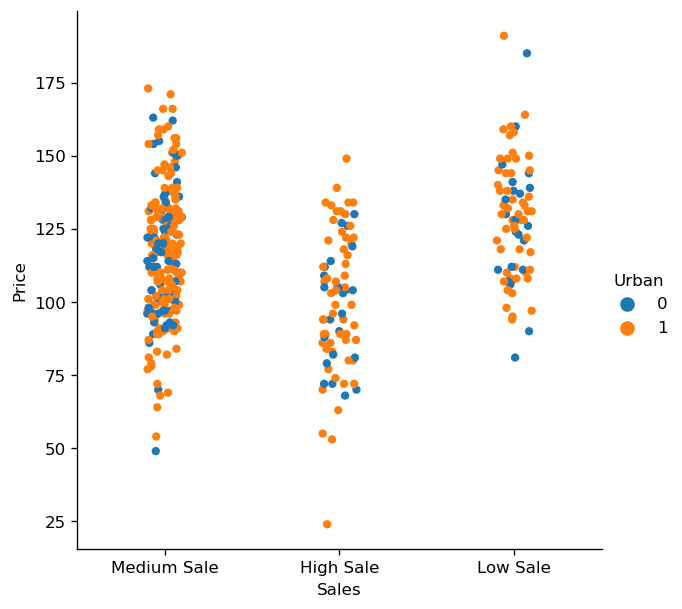

In [12]:
sns.catplot(x = 'Sales',y='Price',hue='Urban', data=df)

C:\Users\Lenovo\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Sales', ylabel='Advertising'>

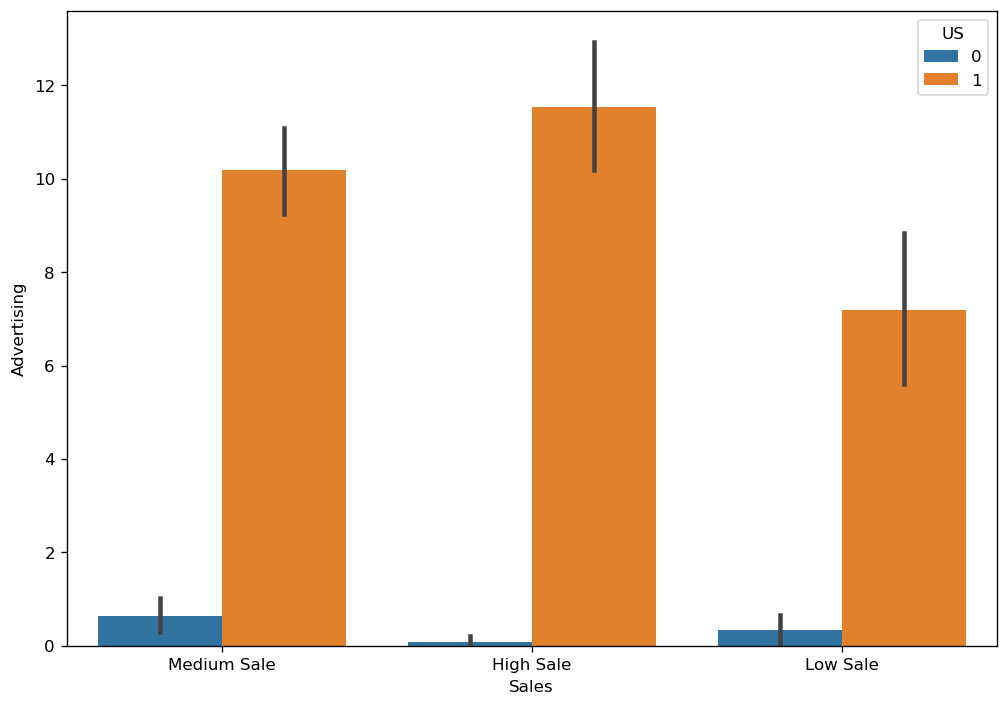

In [13]:
sns.barplot('Sales','Advertising', hue='US', data=df)

C:\Users\Lenovo\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Sales', ylabel='count'>

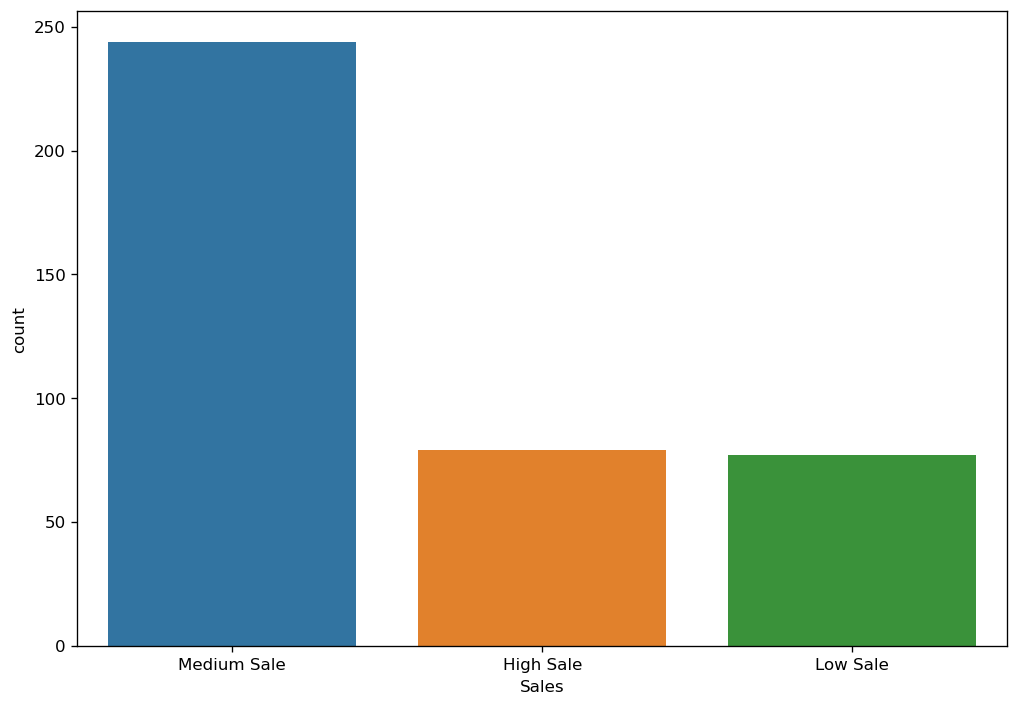

In [14]:
sns.countplot(df['Sales'])

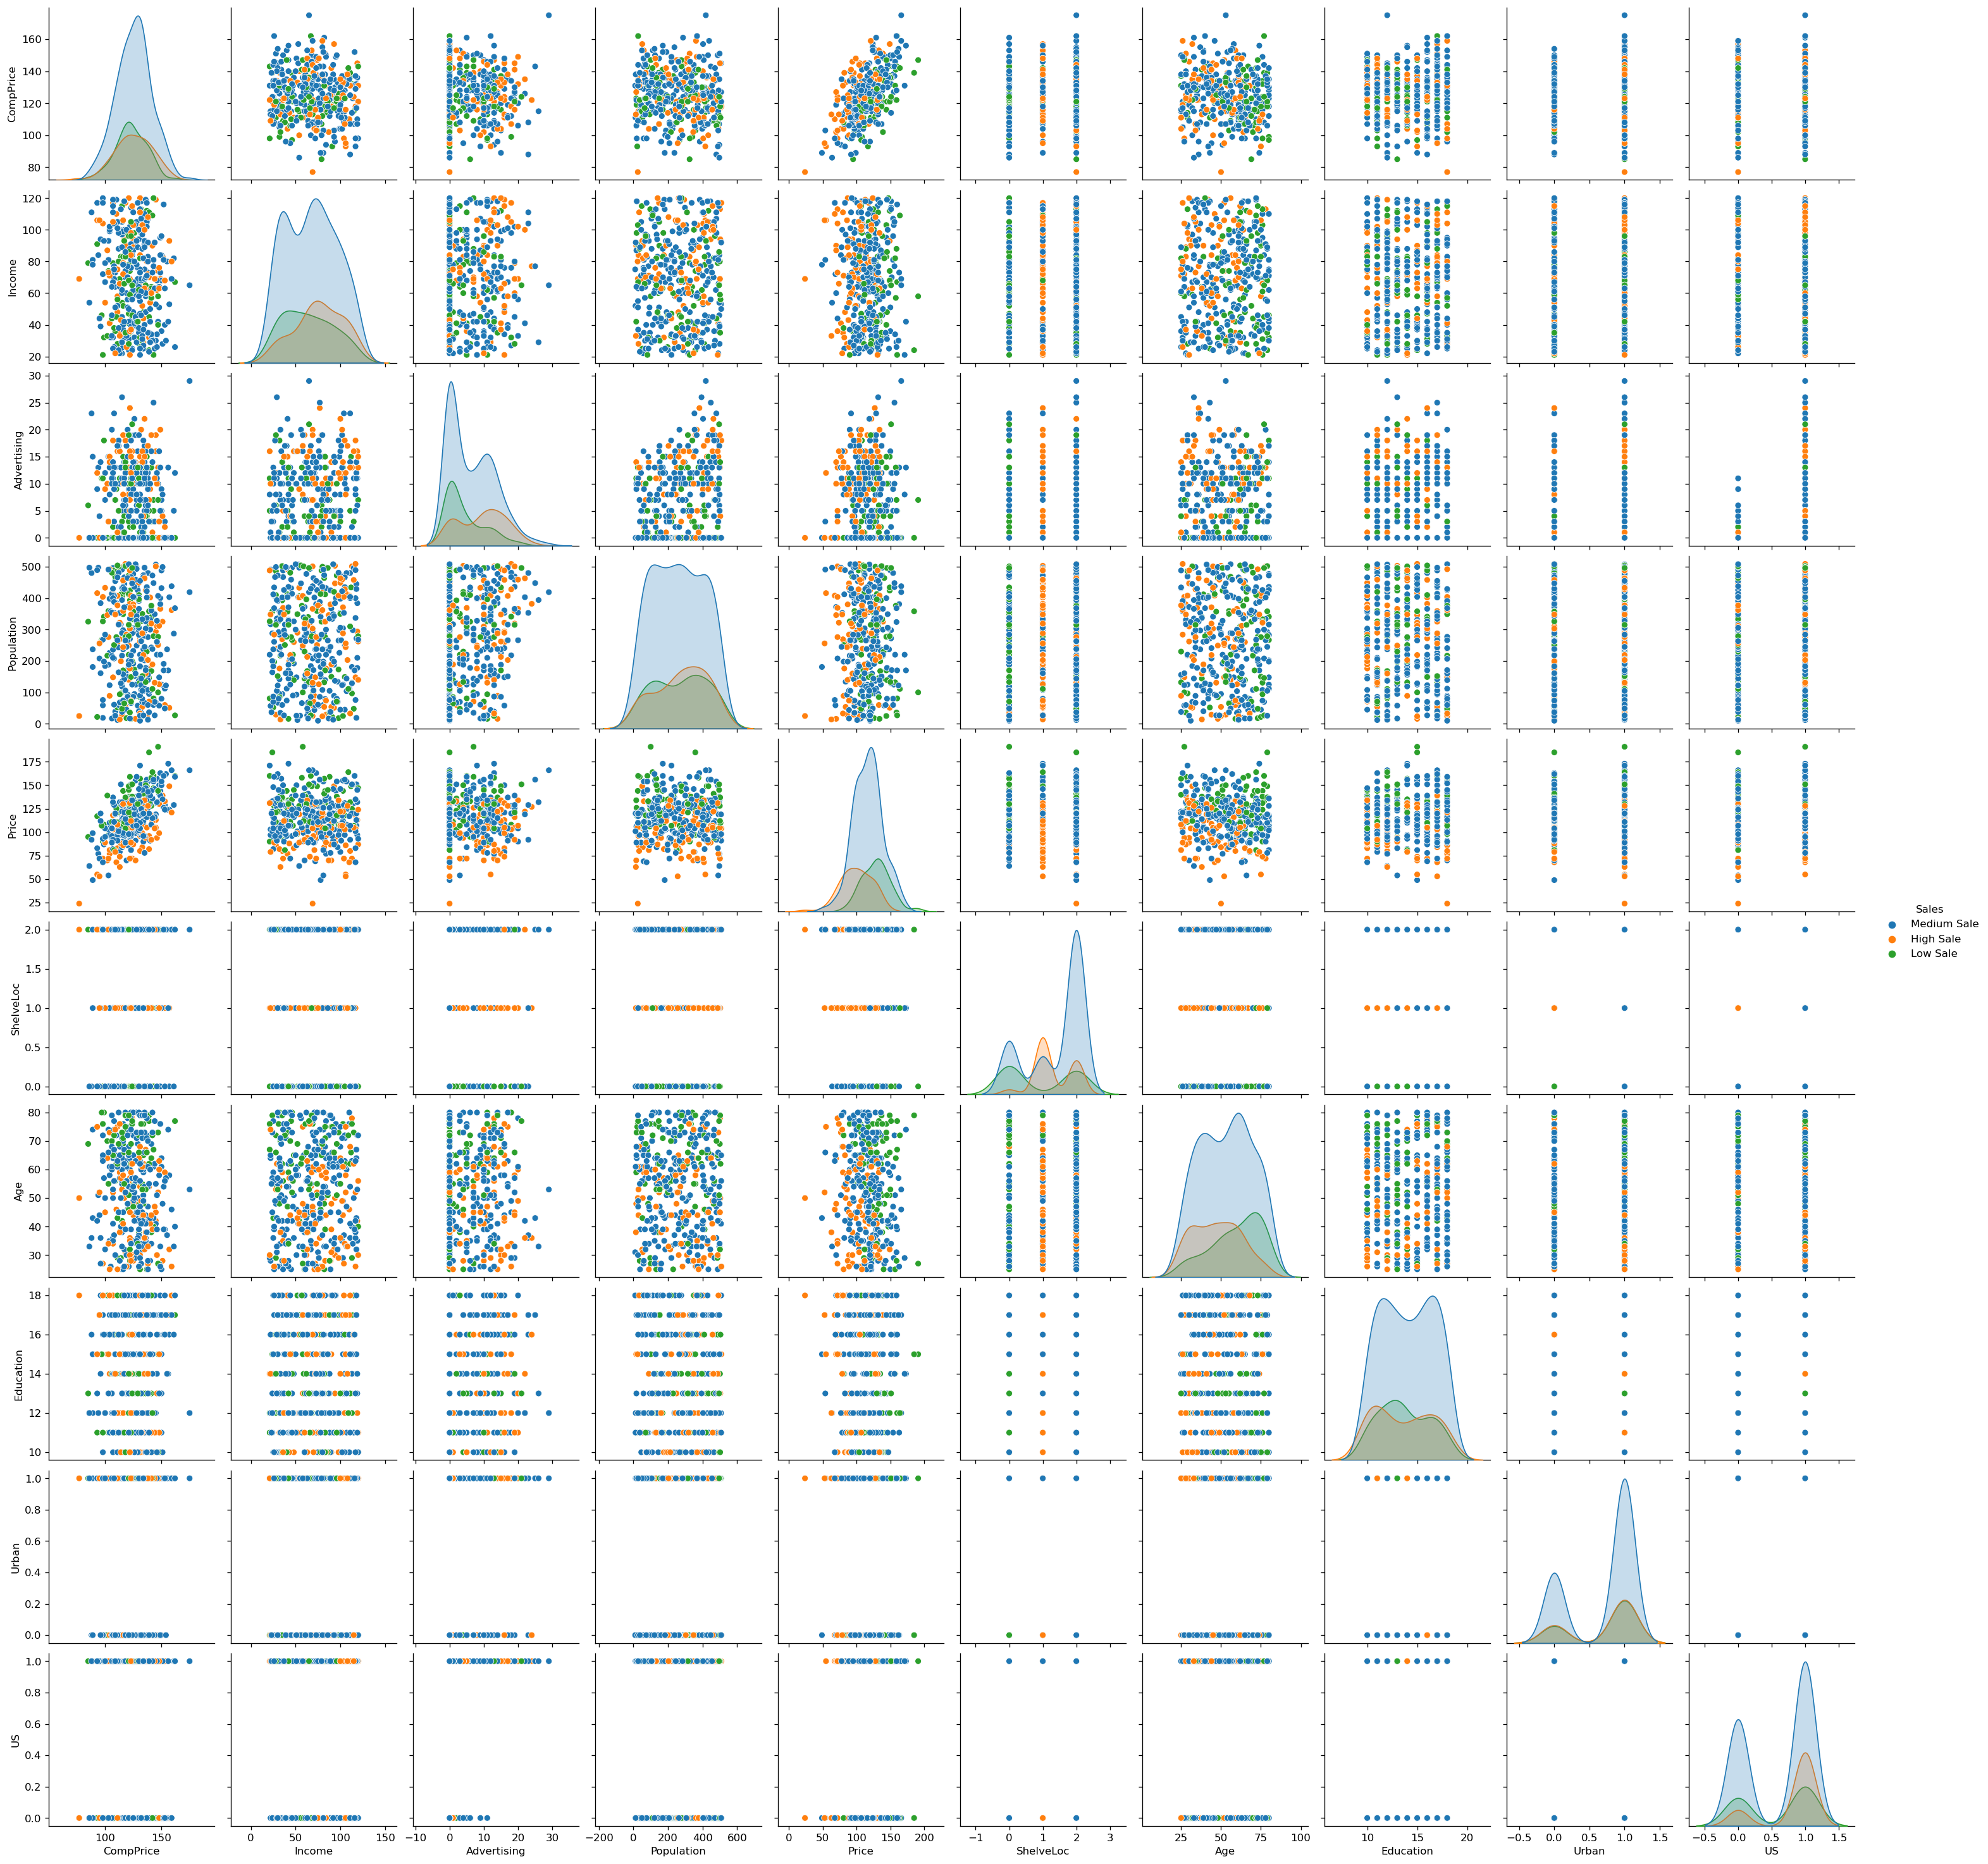

In [15]:
sns.pairplot(df, hue='Sales')

## MODEL BUILDING 

In [21]:
x = df.iloc[:,1:11]
y = df['Sales']

In [18]:
from sklearn.model_selection import train_test_split

In [24]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.2)

In [25]:
model = RandomForestClassifier(n_estimators=10)

In [26]:
model.fit(x_train,y_train)

RandomForestClassifier(n_estimators=10)

In [27]:
y_pred = model.predict(x_test)

In [29]:
from sklearn.metrics import accuracy_score, classification_report,confusion_matrix

print('The accuracy score is: ', accuracy_score(y_test,y_pred))
print('--------------------------------------------------------')
print('Confusion matrix is: ', confusion_matrix(y_test,y_pred))
print('--------------------------------------------------------')
print('Classification report is: ', classification_report(y_test,y_pred))

The accuracy score is:  0.6125
--------------------------------------------------------
Confusion matrix is:  [[ 8  0  8]
 [ 0  7  9]
 [ 6  8 34]]
--------------------------------------------------------
Classification report is:                precision    recall  f1-score   support

   High Sale       0.57      0.50      0.53        16
    Low Sale       0.47      0.44      0.45        16
 Medium Sale       0.67      0.71      0.69        48

    accuracy                           0.61        80
   macro avg       0.57      0.55      0.56        80
weighted avg       0.61      0.61      0.61        80



**HYPERPARAMETER TUNING WITH GRIDSEARCH CV**

In [30]:
from sklearn.model_selection import GridSearchCV

In [31]:
params = {
    'n_estimators' : [5,6,7,8,9,10,11,12,13,14,15,16,17,18],
    'criterion' : ['entropy','gini'],
    'max_depth' : [5,10,15,None],
    'max_features' : ["auto", "sqrt", "log2"],
    'bootstrap' : [True, False]
}

In [32]:
rf = RandomForestClassifier()
grid_search = GridSearchCV(estimator=rf, param_grid=params,cv=10)
grid_search.fit(x_train,y_train)

GridSearchCV(cv=10, estimator=RandomForestClassifier(),
             param_grid={'bootstrap': [True, False],
                         'criterion': ['entropy', 'gini'],
                         'max_depth': [5, 10, 15, None],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'n_estimators': [5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15,
                                          16, 17, 18]})

In [33]:
grid_search.best_estimator_

RandomForestClassifier(bootstrap=False, max_depth=15, max_features='log2',
                       n_estimators=13)

In [34]:
rf_model = RandomForestClassifier(bootstrap=False, max_depth=15, max_features='log2',n_estimators=13)

In [35]:
rf_model.fit(x_train,y_train)
rf_pred = rf_model.predict(x_test)

In [37]:
print('The accuracy score is: ', accuracy_score(y_test,rf_pred))
print('--------------------------------------------------------')
print('Confusion matrix is: ', confusion_matrix(y_test,rf_pred))
print('--------------------------------------------------------')
print('Classification report is: ', classification_report(y_test,rf_pred))

The accuracy score is:  0.6875
--------------------------------------------------------
Confusion matrix is:  [[13  0  3]
 [ 0  6 10]
 [ 7  5 36]]
--------------------------------------------------------
Classification report is:                precision    recall  f1-score   support

   High Sale       0.65      0.81      0.72        16
    Low Sale       0.55      0.38      0.44        16
 Medium Sale       0.73      0.75      0.74        48

    accuracy                           0.69        80
   macro avg       0.64      0.65      0.64        80
weighted avg       0.68      0.69      0.68        80



In [38]:
rf_model.feature_importances_

array([0.12752303, 0.09880106, 0.08557372, 0.11039862, 0.18507775,
       0.13126606, 0.15130886, 0.0734559 , 0.0135398 , 0.0230552 ])

In [39]:
feature_imp = pd.DataFrame({'feature': list(x_train.columns),
                   'importance': rf_model.feature_importances_}).\
                    sort_values('importance', ascending = False)
feature_imp

,feature,importance
4,Price,0.185078
6,Age,0.151309
5,ShelveLoc,0.131266
0,CompPrice,0.127523
3,Population,0.110399
1,Income,0.098801
2,Advertising,0.085574
7,Education,0.073456
9,US,0.023055
8,Urban,0.013540


**CONCLUSION**

- Price is the most important feature in the dataset.
- We have also increased accuracy of the model slightly with hyperparameter tuning.